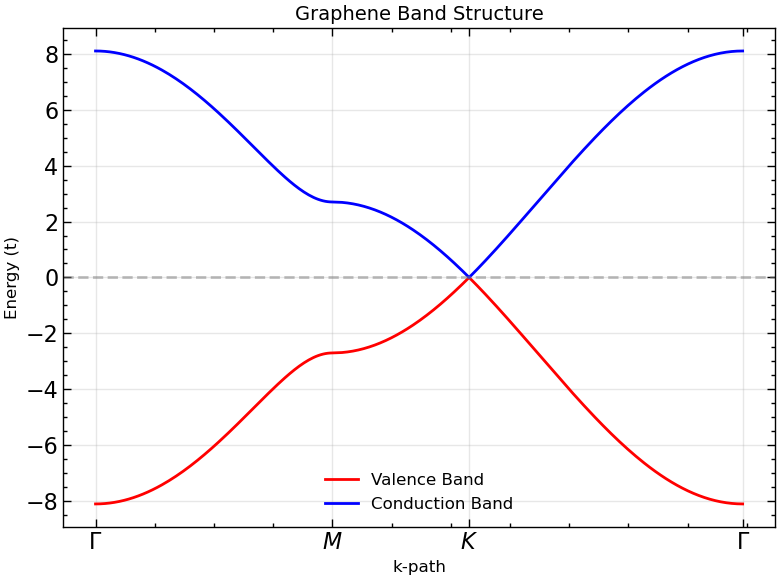

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# Parameters
a = 1.0  # Lattice constant
t = 2.7  # Hopping energy (can be 2.7 eV for real graphene)

# Correct nearest-neighbor vectors (from A to B)
delta = np.array([
    [1.0, 0.0],
    [-0.5,  np.sqrt(3)/2],
    [-0.5, -np.sqrt(3)/2]
]) * a

# High symmetry points (Γ, M, K) in Cartesian k-space
Gamma = np.array([0, 0])
M = (2 * np.pi / (3 * a)) * np.array([1, 0])
K = (2 * np.pi / (3 * a)) * np.array([1, 1 / np.sqrt(3)])

# Path: Γ → M → K → Γ
k_points = [Gamma, M, K, Gamma]
labels = [r'$\Gamma$', r'$M$', r'$K$', r'$\Gamma$']
Nk = 100  # Number of points per segment

# Interpolation along k-path
def interpolate_kpath(points, Nk):
    path = []
    ticks = [0]
    for i in range(len(points) - 1):
        seg = np.linspace(points[i], points[i+1], Nk, endpoint=False)
        path.extend(seg)
        ticks.append(len(path))
    path.append(points[-1])
    return np.array(path), ticks

# Define the Hamiltonian matrix
def H_k(kx, ky):
    k = np.array([kx, ky])
    f = np.sum([np.exp(1j * np.dot(k, d)) for d in delta])
    return np.array([[0, -t * np.conj(f)],
                     [-t * f, 0]])

# Generate k-path and compute band energies
k_path, tick_locations = interpolate_kpath(k_points, Nk)
energies = np.array([np.linalg.eigvalsh(H_k(k[0], k[1])) for k in k_path])

# Compute cumulative distance for x-axis
k_dists = np.cumsum(np.linalg.norm(np.diff(k_path, axis=0), axis=1))
k_dists = np.insert(k_dists, 0, 0.0)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_dists, energies[:, 0], 'r', label='Valence Band')
plt.plot(k_dists, energies[:, 1], 'b', label='Conduction Band')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.xticks([k_dists[i] for i in tick_locations], labels)
plt.xlabel("k-path", fontsize=12)
plt.ylabel("Energy (t)", fontsize=12)
plt.title("Graphene Band Structure", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import plotly.graph_objects as go

# Parameters
a = 1.0     # lattice constant
t = 2.7     # hopping energy

# Nearest-neighbor vectors (from A to B)
delta = np.array([
    [1.0, 0.0],
    [-0.5,  np.sqrt(3)/2],
    [-0.5, -np.sqrt(3)/2]
]) * a

# Extended grid in kx-ky space
N = 300   # grid resolution
kx_vals = np.linspace(-4*np.pi/a, 4*np.pi/a, N)
ky_vals = np.linspace(-4*np.pi/a, 4*np.pi/a, N)
kx, ky = np.meshgrid(kx_vals, ky_vals)

# Tight-binding Hamiltonian diagonalization
Ek_plus = np.zeros_like(kx)
Ek_minus = np.zeros_like(kx)

def f_k(kx, ky):
    f = 0
    for d in delta:
        f += np.exp(1j * (kx * d[0] + ky * d[1]))
    return f

for i in range(N):
    for j in range(N):
        f = f_k(kx[i, j], ky[i, j])
        H = np.array([[0, -t * np.conj(f)], [-t * f, 0]])
        eigs = np.linalg.eigvalsh(H)
        Ek_minus[i, j], Ek_plus[i, j] = eigs

# Plot using Plotly 3D
fig = go.Figure()

fig.add_trace(go.Surface(
    x=kx, y=ky, z=Ek_plus,
    colorscale='Blues',
    name='Conduction Band',
    showscale=False,
    opacity=0.9
))

fig.add_trace(go.Surface(
    x=kx, y=ky, z=Ek_minus,
    colorscale='Reds',
    name='Valence Band',
    showscale=False,
    opacity=0.9
))

# Layout
fig.update_layout(
    title='Full 3D Graphene Band Structure (Extended Zone Scheme)',
    scene=dict(
        xaxis_title='kₓ',
        yaxis_title='k_y',
        zaxis_title='Energy (t)',
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=0.5)
    ),
    width=900,
    height=750,
    margin=dict(l=10, r=10, b=10, t=40)
)

fig.show()
